In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv', header=0)
female = train_df.query("Sex == 'female'")

male = train_df.query("Sex == 'male'")

print('Number of Femele =' + str(len(female)))
print('Number of Male =' + str(len(male)))


Number of Femele =314
Number of Male =577


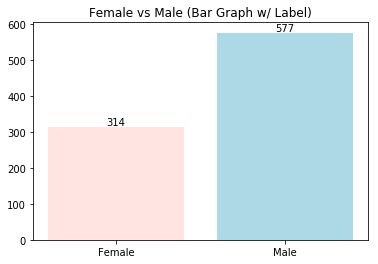

In [3]:
plt.title('Female vs Male (Bar Graph w/ Label)')
plt.bar(['Female', 'Male'], [len(female), len(male)], color=['mistyrose', 'lightblue'])
plt.text('Female', len(female), len(female), ha='center', va='bottom')
plt.text('Male', len(male), len(male), ha='center', va='bottom')
plt.show()

In [4]:
female_dead = train_df.query("Sex == 'female' & Survived == 0")
female_survived = train_df.query("Sex == 'female' & Survived == 1")
male_dead = train_df.query("Sex == 'male' & Survived == 0")
male_survived = train_df.query("Sex == 'male' & Survived == 1")

print('Number of Female (Dead)     = ' + str(len(female_dead)))
print('Number of Female (Survived) = ' + str(len(female_survived)))
print('Number of Male (Dead)       = ' + str(len(male_dead)))
print('Number of Male (Survived)   = ' + str(len(male_survived)))

Number of Female (Dead)     = 81
Number of Female (Survived) = 233
Number of Male (Dead)       = 468
Number of Male (Survived)   = 109


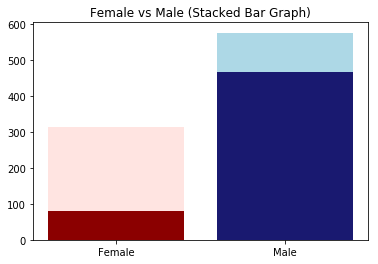

In [5]:
plt.title('Female vs Male (Stacked Bar Graph)')
plt.bar(['Female', 'Male'], [len(female_dead), len(male_dead)], color=['darkred', 'midnightblue'])
plt.bar(['Female', 'Male'], [len(female_survived), len(male_survived)], bottom=[len(female_dead), len(male_dead)], color=['mistyrose', 'lightblue'])
#bottom属性によって、棒グラフの底(始点)を最初に描画した死者の棒グラフの一番上に指定することで、積み上げ棒グラフになります。
plt.show()

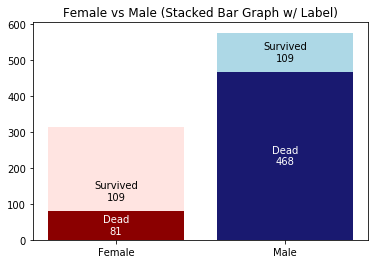

In [6]:
plt.title('Female vs Male (Stacked Bar Graph w/ Label)')
plt.bar(['Female', 'Male'], [len(female_dead), len(male_dead)], color=['darkred', 'midnightblue'])
plt.bar(['Female', 'Male'], [len(female_survived), len(male_survived)], bottom=[len(female_dead), len(male_dead)], color=['mistyrose', 'lightblue'])
plt.text('Female', len(female_dead)/2, "Dead\n" + str(len(female_dead)), color='white', ha='center', va='center')
plt.text('Female', len(female_dead) + len(male_survived)/2, "Survived\n" + str(len(male_survived)), color='black', ha='center', va='center')
plt.text('Male', len(male_dead)/2, "Dead\n" + str(len(male_dead)), color='white', ha='center', va='center')
plt.text('Male', len(male_dead) + len(male_survived)/2, "Survived\n" + str(len(male_survived)), color='black', ha='center', va='center')
plt.show()

In [7]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv', header=0)
test_df["Survived"] = 0
test_df.loc[test_df["Sex"] == 'female', "Survived"] = 1
test_df = test_df.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
print(test_df.head(5))
print(test_df.tail(5))
test_df.to_csv(path_or_buf='submission.csv', index=False)


   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
     PassengerId  Survived
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0
